## Agenda

- hierarchical clustering
- more features from text: bigrams, tf-idf, sentiment
- Naive Bayes classifiers
- Training, Testing and Validation in supervised learning


## Hierarchical Clustering

Last week we saw KMeans clustering - grouping points together based on thier distance from a centroid and repeating until there are no changes in the centroid position. 

KMeans is good if you know how many clusters to expect.

If you don't know how many clusters there might be, **Hierarchical Clustering** may be more useful.

###  Bottom Up

Bottom up (*agglomorative*) clustering is easiest to understand.  We start with the idea of *similarity* that is used in
KMeans to measure how close together two items are and compute an $N x N$ *similarity matrix* containing
the similarity between all pairs of items.  

We then select the closest pair of items and merge them into our first cluster of two.

Next we merge the next closest.  This could be another two single items or it could be one item and
the just created cluster of two.  To measure the distance from the cluster we need a function that 
can compare clusters - this could just be a measure between the means of all cluster points or something
more complex.

This continues until there is just one cluster. 

We can visualise the clustering with a **dendrogram** -- a tree-like display of the clusters as they grow.

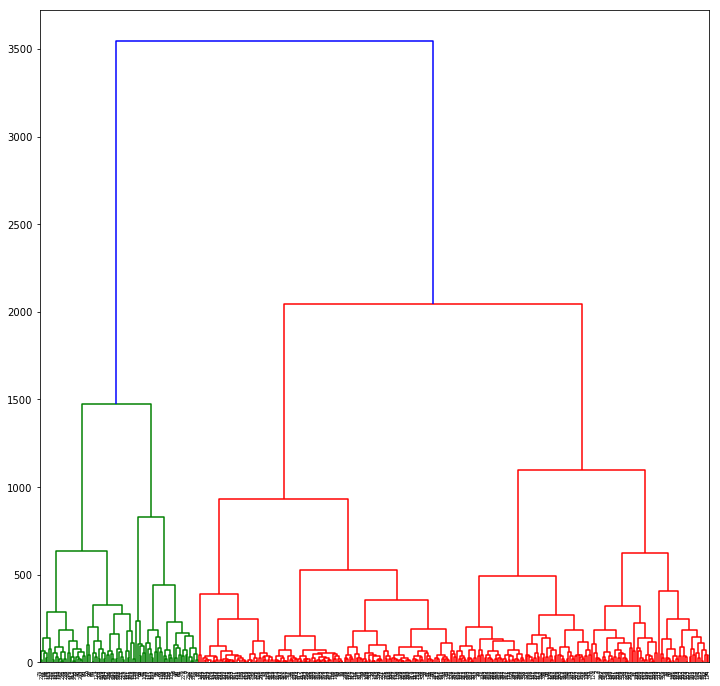

In [40]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist


names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
autompgN = autompg.drop('name', axis=1)
names = autompg['name']

dist = pdist(autompgN, 'euclidean')
linkage_matrix = linkage(dist,method = 'complete')

plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix);

plt.show()


Based on this clustering we can look to see how many clusters make sense for the data. The height of the lines joining clusters is a measure of how far they are from each other.

In this example it looks like there are two major clusters (red and green) The height of the blue lines is quite big suggesting that these two groups are quite distinct.  However there is also a big difference at the next level, so we might suggest that four major clusters are represented in the data. 

We could then look at which cars were in these clusters to see if they make sense.  

When would you use this? 


** Defining the similarity of two clusters:**

The linkage criterion determines the metric used for the merge strategy:

+ *Maximum* or *complete* linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.

+ *Average* linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.

+ *Single* linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.

+ *Ward* minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.


## Top Down

Top down hierarchical clustering works by first splitting the data into two, then splitting each of those clusters into two.   The process stops either when a target number of clusters is reached or there is one item per cluster.

To split the data in two, another clustering algorithm is needed.  This could be KMeans clustering for example.

This are more efficient than Bottom Up since fewer comparisons may be needed (we don't need to compute every pairwise distance, just distance from each point to the cluster centroids).

## More Features from Text

Last week we looked at how to turn text into feature vectors so that we can analyse it. This week I want to introduce sentiment analysis and discuss how it can be used and how it is done.

Sentiment analysis is a machine learning task - given a text, predict the value of *polarity* where a polarity of +1 indicates a very positive sentiment and -1 indicates a negative one.  A text expresses sentiment towards something or other - a movie, a brand, so sentiment isn't an absolute thing.  

Since it is an ML task, we need *training data* to train a model of some kind.  So we gather examples texts
and someone ranks them as positive or negative sentiment towards their subject.  One common source is movie
reviews since people often rank a movie numerically as well as leaving a textual review.

> **1 Star** I was unbelievably bored and extremely frustrated because who cares. It's a filler movie! You know.. those movies in the middle of epic ones just to keep things moving. Boring actors maybe it was. Omg I want my money back I paid for 6 premium tickets! Not happy at all 

> **4 Stars** I must be born in another universe, because everyone keeps referring to this film as a side story when in fact it's a direct prequel to the first Star Wars (the devil take Lucas' mind control order, "This is the 4th film, not the 1st."). The rebels of the Rebel Alliance (that's rebellion twice removed) breakaway to steal the plans for the Empire's uberweapon, and it's as rousing and rollicking a tale as the first one was. Star Wars is back, baby, and as mad as hell. See it all ye fans.

First let's look at a package that can give us an out of the box sentiment measure. This is the [textblob](https://textblob.readthedocs.io/en/dev/) package which makes use of [NLTK](http://www.nltk.org/) which is
a widely used Python module for natural language processing. 


In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [50]:

text = '''This is a great course, I love the examples in the notebooks! 
However, Steve is sometimes a bit disorganised and can't get them to work.
On the whole though I like what is happening.  I saw Star Trek last week
and it was not a good experience.  We hate the way that they make them these days.
His name was Mr. Bobalooba and he could dance like a daemon!
'''

blob = TextBlob(text)

for sentence in blob.sentences:
    print(sentence.sentiment.polarity, sentence.sentiment.subjectivity, sentence)


0.7125 0.675 This is a great course, I love the examples in the notebooks!
0.0 0.0 However, Steve is sometimes a bit disorganised and can't get them to work.
0.2 0.4 On the whole though I like what is happening.
-0.175 0.33333333333333337 I saw Star Trek last week
and it was not a good experience.
-0.8 0.9 We hate the way that they make them these days.
0.0 0.0 His name was Mr. Bobalooba and he could dance like a daemon!


In [51]:
TextBlob("This is not a good movie").sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

## Naive Bayes Classifier

This is another classification algorithm (cf. logistic regression) [this blog post](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) has a good exposition.

We have a range of ML algorithms to classify observations [how do you choose between them](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)? 

See the [TextBlob Classifiers Tutorial](https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers) for an example of how to build a text classifier using Naive Bayes.

## Text Features

Talk about:

- Using TF-IDF scaling on words as features (Textbook Section 10.3, [SciKit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting))
- Using bigrams and trigrams instead of just words (Textbook Section 10.3.1)


## Training, Testing and Validation

The importance of splitting datasets when training predictive models (Textbook Section 5.6)

Cross-validation as an optimisation method.  (Textbook Section 5.3, 5.6)
